In [1]:
import tensorflow_data_validation as tfdv
import tensorflow_transform as tft
import tensorflow_transform.beam as tft_beam
import tensorflow as tf
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext
_pipeline_root = 'pipeline/'
context = InteractiveContext(pipeline_root=_pipeline_root)

2023-04-12 16:53:35.987555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 16:53:36.094001: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-12 16:53:36.094020: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-12 16:53:36.655028: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# from sklearn.preprocessing import SandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Test2/data2/train.csv')
print(df.dtypes)
df.describe(include='all')

store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object


,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [ ]:
df.head()

In [ ]:
df.drop('total_children',axis=1,inplace=True)

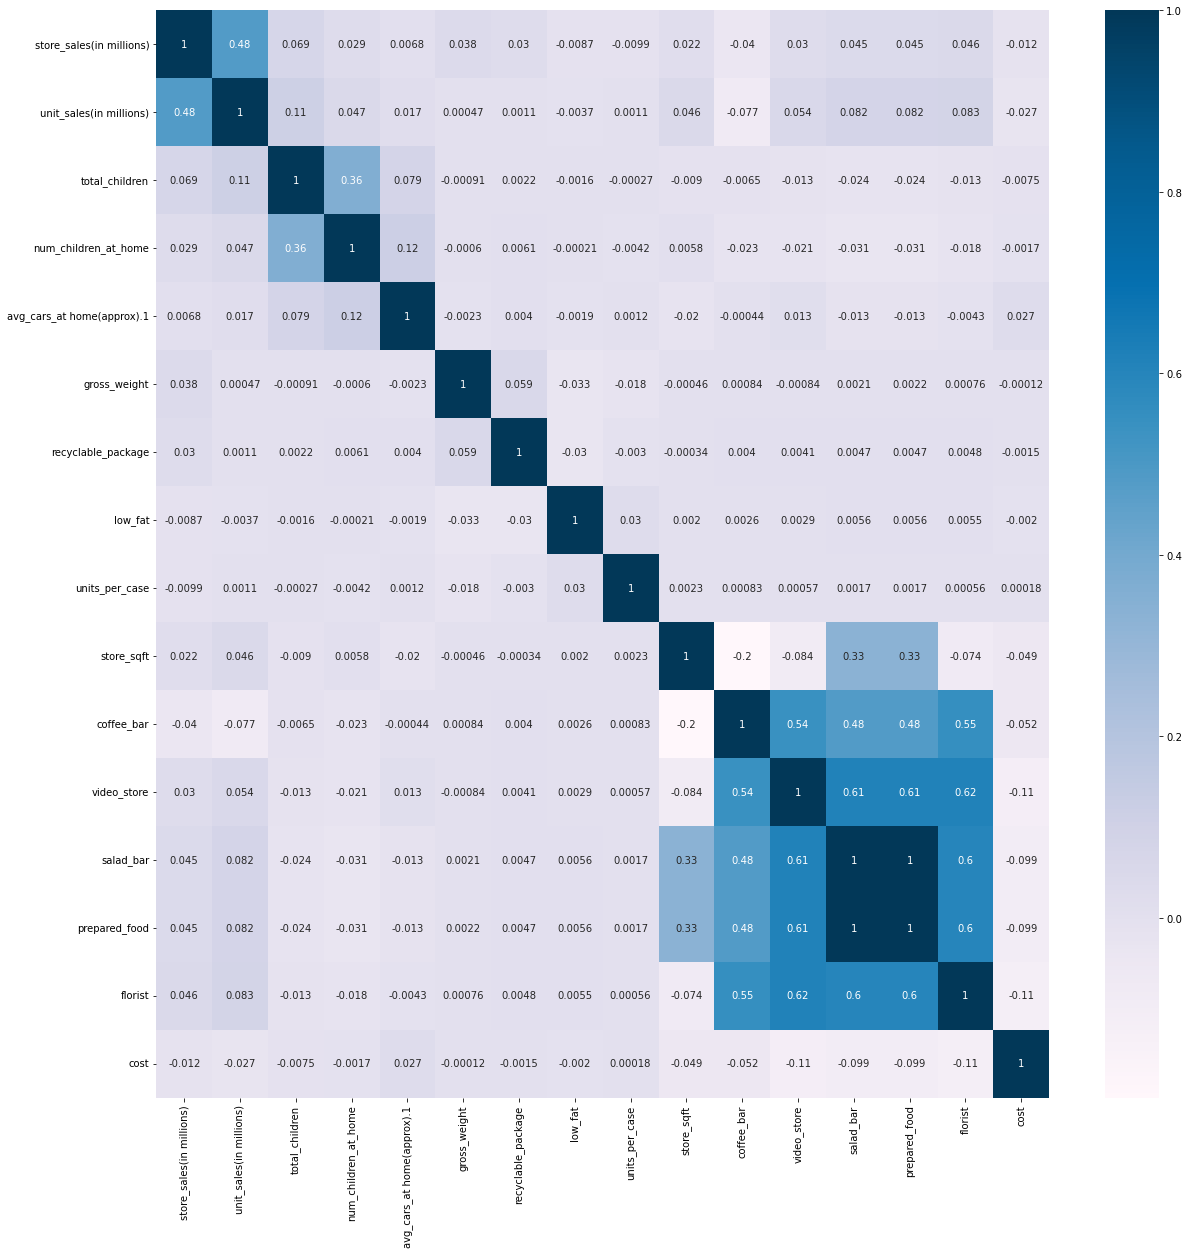

In [8]:
cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.savefig('CorrFun.png',dpi=200)

In [ ]:
cor_target = abs(cor['cost'])
relevant_features = cor_target[cor_target>=0.00]
names = [index for index,value in relevant_features.iteritems()]
# names.remove('cost')
names

In [ ]:
plt.figure(figsize=(20,20))
new_corr = df[names].corr()
sns.heatmap(new_corr,annot=True,cmap=plt.cm.Blues)

In [ ]:
new_names = [x for x in names if x not in ['gross_weight','units_per_case','recyclable_package']]
new_names

In [ ]:
df[new_names].head()

In [ ]:
# df.drop('prepared_food',axis=0,inplace=True)
df[new_names].to_csv('data/train_features.csv', index=False)

In [18]:
import pandas as pd
df2 = pd.read_csv('data/train_features.csv')
df2.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,low_fat,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3.0,2.0,2.0,2.0,0.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,0.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,0.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,1.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,1.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [19]:
bins = [50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150]
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df2['cost_bin']=pd.cut(df2['cost'],bins,labels=labels)

In [45]:
df2.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,low_fat,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,cost_bin
0,8.61,3.0,2.0,2.0,2.0,0.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09,2
1,5.00,2.0,4.0,0.0,3.0,0.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80,14
2,14.08,4.0,0.0,0.0,3.0,0.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51,6
3,4.02,3.0,5.0,0.0,0.0,1.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78,3
4,2.13,3.0,5.0,0.0,3.0,1.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51,12


In [48]:
df2.drop('cost',axis=1,inplace=True)

In [50]:
new_names

['store_sales(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'low_fat',
 'store_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost_bin']

In [49]:
new_names = [i for i in df2.keys()]

In [51]:
df2[new_names].to_csv('data1/train_features_binned.csv',index=False)

In [9]:
from tfx.proto import example_gen_pb2
import os
from tfx.components import CsvExampleGen


output= example_gen_pb2.Output(
split_config=example_gen_pb2.SplitConfig(splits=[
    example_gen_pb2.SplitConfig.Split(name='train',hash_buckets=8),
    example_gen_pb2.SplitConfig.Split(name='eval',hash_buckets=2)
    ])   
)

examples_gen = CsvExampleGen(input_base='data1',output_config=output)
context.run(examples_gen)

ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 103
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}))

In [10]:
from tfx.components import StatisticsGen

statistics_gen = StatisticsGen(
    examples=examples_gen.outputs['examples']
)
context.run(statistics_gen)

ExecutionResult(
    component_id: StatisticsGen
    execution_id: 104
    outputs:
        statistics: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=StatisticsGen, output_key=statistics, additional_properties={}, additional_custom_properties={}))

In [11]:
context.show(statistics_gen.outputs['statistics'])

In [12]:
from tfx.components import SchemaGen

schema_gen = SchemaGen(
    statistics=statistics_gen.outputs['statistics'],
    infer_feature_shape=True
)
context.run(schema_gen)

ExecutionResult(
    component_id: SchemaGen
    execution_id: 105
    outputs:
        schema: OutputChannel(artifact_type=Schema, producer_component_id=SchemaGen, output_key=schema, additional_properties={}, additional_custom_properties={}))

In [13]:
context.show(schema_gen.outputs['schema'])

,Type,Presence,Valency,Domain
Feature name,,,,
'avg_cars_at home(approx).1',FLOAT,required,,-
'coffee_bar',FLOAT,required,,-
'cost_bin',INT,required,,-
'florist',FLOAT,required,,-
'low_fat',FLOAT,required,,-
'num_children_at_home',FLOAT,required,,-
'prepared_food',FLOAT,required,,-
'salad_bar',FLOAT,required,,-
'store_sales(in millions)',FLOAT,required,,-


In [14]:
from tfx.components import ExampleValidator

example_validator = ExampleValidator(
    statistics=statistics_gen.outputs['statistics'],
    schema=schema_gen.outputs['schema']
)
context.run(example_validator)

ExecutionResult(
    component_id: ExampleValidator
    execution_id: 106
    outputs:
        anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=ExampleValidator, output_key=anomalies, additional_properties={}, additional_custom_properties={}))

In [15]:
shops_constants_file = 'shops_constants.py'

In [46]:
%%writefile {shops_constants_file}

NORMALIZE_TO_0_1 = {'store_sales(in millions)':None,'store_sqft':None}
FLOAT_TO_INT = {'avg_cars_at home(approx).1':None,'coffee_bar':None,'florist':None,'salad_bar':None,'unit_sales(in millions)':None,'video_store':None,'total_children':None,'num_children_at_home':None,'low_fat':None,'prepared_food':None}
LABEL_CHANGE = {'cost_bin':None}

def transformed_name(key):
    return key + '_xf'


Overwriting shops_constants.py


In [16]:
shops_transform_file = 'shops_transform.py'

In [48]:
%%writefile {shops_transform_file}

import tensorflow as tf
import tensorflow_transform as tft

import shops_constants

transformed_name = shops_constants.transformed_name
NORMALIZE_TO_0_1 = shops_constants.NORMALIZE_TO_0_1
FLOAT_TO_INT = shops_constants.FLOAT_TO_INT
LABEL_CHANGE = shops_constants.LABEL_CHANGE

def preprocessing_fn(inputs):
    outputs = {}

    for key in FLOAT_TO_INT.keys():
        key_data3 = inputs[key]
        changed_data3 = tf.cast(key_data3,dtype=tf.int64)
        outputs[transformed_name(key)] = changed_data3

    for key in NORMALIZE_TO_0_1.keys():
        key_data2 = inputs[key]
        scaled_data2 = tft.scale_to_0_1(key_data2)
        outputs[transformed_name(key)] = scaled_data2
    
    for key in LABEL_CHANGE.keys():
        key_data4 = inputs[key]
        scaled_data4 = key_data4#tft.scale_to_0_1(key_data4)
        outputs[transformed_name(key)] = scaled_data4


    return outputs

Overwriting shops_transform.py


In [17]:
import tfx
transform = tfx.components.Transform(
    examples = examples_gen.outputs['examples'],
    schema = schema_gen.outputs['schema'],
    module_file=os.path.abspath(shops_transform_file)
)
context.run(transform)

running bdist_wheel
running build
running build_py
creating build
creating build/lib
copying inference.py -> build/lib
copying shops_trainer.py -> build/lib
copying shops_constants.py -> build/lib
copying shops_transform.py -> build/lib
installing to /tmp/tmpzcfsgv2g
running install
running install_lib
copying build/lib/shops_transform.py -> /tmp/tmpzcfsgv2g
copying build/lib/shops_constants.py -> /tmp/tmpzcfsgv2g
copying build/lib/shops_trainer.py -> /tmp/tmpzcfsgv2g
copying build/lib/inference.py -> /tmp/tmpzcfsgv2g
running install_egg_info
running egg_info
creating tfx_user_code_Transform.egg-info
writing tfx_user_code_Transform.egg-info/PKG-INFO
writing dependency_links to tfx_user_code_Transform.egg-info/dependency_links.txt
writing top-level names to tfx_user_code_Transform.egg-info/top_level.txt
writing manifest file 'tfx_user_code_Transform.egg-info/SOURCES.txt'


/home/thakur/anaconda3/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


reading manifest file 'tfx_user_code_Transform.egg-info/SOURCES.txt'
writing manifest file 'tfx_user_code_Transform.egg-info/SOURCES.txt'
Copying tfx_user_code_Transform.egg-info to /tmp/tmpzcfsgv2g/tfx_user_code_Transform-0.0+6493b972e1e16e8cc2bc2712a23c956888cae0c9ef469fb5940bb6e109bc7b84-py3.9.egg-info
running install_scripts
creating /tmp/tmpzcfsgv2g/tfx_user_code_Transform-0.0+6493b972e1e16e8cc2bc2712a23c956888cae0c9ef469fb5940bb6e109bc7b84.dist-info/WHEEL
creating '/tmp/tmpfj4w9it5/tfx_user_code_Transform-0.0+6493b972e1e16e8cc2bc2712a23c956888cae0c9ef469fb5940bb6e109bc7b84-py3-none-any.whl' and adding '/tmp/tmpzcfsgv2g' to it
adding 'inference.py'
adding 'shops_constants.py'
adding 'shops_trainer.py'
adding 'shops_transform.py'
adding 'tfx_user_code_Transform-0.0+6493b972e1e16e8cc2bc2712a23c956888cae0c9ef469fb5940bb6e109bc7b84.dist-info/METADATA'
adding 'tfx_user_code_Transform-0.0+6493b972e1e16e8cc2bc2712a23c956888cae0c9ef469fb5940bb6e109bc7b84.dist-info/WHEEL'
adding 'tfx_user_

2023-04-12 17:02:41.698398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-12 17:02:41.698419: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-12 17:02:41.698437: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mako02.fysik.su.se): /proc/driver/nvidia/version does not exist
2023-04-12 17:02:41.698609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
Use ref() instead.


INFO:tensorflow:Assets written to: pipeline/Transform/transform_graph/107/.temp_path/tftransform_tmp/1312e75533734c09b3c15152b57a32a9/assets


INFO:tensorflow:Assets written to: pipeline/Transform/transform_graph/107/.temp_path/tftransform_tmp/1312e75533734c09b3c15152b57a32a9/assets


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:Assets written to: pipeline/Transform/transform_graph/107/.temp_path/tftransform_tmp/83d66a9ccdee459fa46db16c38792ac2/assets


INFO:tensorflow:Assets written to: pipeline/Transform/transform_graph/107/.temp_path/tftransform_tmp/83d66a9ccdee459fa46db16c38792ac2/assets


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:tensorflow_text is not available.


ExecutionResult(
    component_id: Transform
    execution_id: 107
    outputs:
        transform_graph: OutputChannel(artifact_type=TransformGraph, producer_component_id=Transform, output_key=transform_graph, additional_properties={}, additional_custom_properties={})
        transformed_examples: OutputChannel(artifact_type=Examples, producer_component_id=Transform, output_key=transformed_examples, additional_properties={}, additional_custom_properties={})
        updated_analyzer_cache: OutputChannel(artifact_type=TransformCache, producer_component_id=Transform, output_key=updated_analyzer_cache, additional_properties={}, additional_custom_properties={})
        pre_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=pre_transform_schema, additional_properties={}, additional_custom_properties={})
        pre_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=pre_transform_stats, additional_properties={}, additional_custom_properties={})
        post_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=post_transform_schema, additional_properties={}, additional_custom_properties={})
        post_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=post_transform_stats, additional_properties={}, additional_custom_properties={})
        post_transform_anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=Transform, output_key=post_transform_anomalies, additional_properties={}, additional_custom_properties={}))

In [18]:
trainer_module_file = 'shops_trainer.py'

In [25]:
%%writefile {trainer_module_file}

import tensorflow as tf
# import tensorflow_decision_forests as tfdf
import tensorflow_transform as tft
from tensorflow_transform.tf_metadata import schema_utils

from absl import logging
from tensorflow.keras import layers, Model, optimizers, losses, metrics
from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from typing import List, Text
import shops_constants
import os

transformed_name = shops_constants.transformed_name
NORMALIZE_TO_0_1 = shops_constants.NORMALIZE_TO_0_1
FLOAT_TO_INT = shops_constants.FLOAT_TO_INT

def model_fn():
    inputs = {}
    for key,item in FLOAT_TO_INT.items():
        inputs[transformed_name(key)] = tf.keras.Input(shape=(1,),name=transformed_name(key))

    for key,item in NORMALIZE_TO_0_1.items():
        inputs[transformed_name(key)] = tf.keras.Input(shape=(1,),name=transformed_name(key))
    # inputs['dental caries_xf'] = tf.keras.Input(shape=(1,),name=transformed_name('dental caries'))
    output = tf.keras.layers.Concatenate()(tf.nest.flatten(inputs))
    # output = tf.keras.layers.BatchNormalization()(output)
    # output = tf.keras.layers.Dense(4096, activation='relu')(output)
    # for i in range(2):
    output = tf.keras.layers.Dense(10000,activation='relu')(output)
    # output = tf.keras.layers.Dropout(0.05)(output)
    output = tf.keras.layers.BatchNormalization()(output)
    # output = tf.keras.layers.Dense(32, activation='relu')(output)
    output = tf.keras.layers.Dense(1000, activation='relu')(output)
    # output = tf.keras.layers.Dense(2048, activation='relu')(output)
    # output = tf.keras.layers.Dense(1024, activation='relu')(output)
    # output = tf.keras.layers.Dense(2048, activation='relu')(output)
    # output = tf.keras.layers.Dense(2048, activation='relu')(output)
    # output = tf.keras.layers.Dense(512, activation='relu')(output)
    # output = tf.keras.layers.Dense(512, activation='relu')(output)
    # output = tf.keras.layers.Dense(512, activation='relu')(output)
    # output = tf.keras.layers.Dense(1024, activation='relu')(output)
    # output = tf.keras.layers.Dense(1024, activation='relu')(output)
    # output = tf.keras.layers.Dense(1024, activation='relu')(output)
    # output = tf.keras.layers.Dense(1024, activation='relu')(output)
    # output = tf.keras.layers.Dense(1024, activation='relu')(output)
    output = tf.keras.layers.Dense(512, activation='relu')(output)
    # output = tf.keras.layers.Dense(512, activation='relu')(output)
    # output = tf.keras.layers.Dense(512, activation='relu')(output)
    # output = tf.keras.layers.Dense(512, activation='relu')(output)
    # output = tf.keras.layers.Dense(512, activation='relu')(output)
    # output = tf.keras.layers.Dense(512, activation='relu')(output)
#     output = tf.keras.layers.Dense(16, activation='relu')(output)
#     output = tf.keras.layers.Dense(16, activation='relu')(output)
#     output = tf.keras.layers.Dense(16, activation='relu')(output)
#     output = tf.keras.layers.Dense(16, activation='relu')(output)
#     output = tf.keras.layers.Dense(16, activation='relu')(output)
    output = tf.keras.layers.Dense(20,activation='softmax')(output)
    model = tf.keras.models.Model(inputs,output)

    # Compile model
    model.compile(optimizer='adam',#tf.keras.optimizers.Adam(learning_rate=0.1),
                loss='sparse_categorical_crossentropy',#mae
                metrics=['sparse_categorical_accuracy'])

    return model





LABEL_KEY = 'cost_bin_xf'

def _gzip_reader_fn(filenames):
    return tf.data.TFRecordDataset(filenames,compression_type='GZIP')

def input_fn(file_pattern, tf_transform_output, batch_size=2000):
    transformed_feature_spec = tf_transform_output.transformed_feature_spec().copy()
    dataset = tf.data.experimental.make_batched_features_dataset(
        file_pattern=file_pattern,
        batch_size=batch_size,
        features=transformed_feature_spec,
        reader=_gzip_reader_fn,
        label_key=LABEL_KEY
    )
    return dataset

def _get_serve_tf_examples_fn(model, tf_transform_output):
    """
    Returns a function that parses a serialized tf.Example and applies
    the transformations during inference.
    Args:
        model: The model that we are serving.
        tf_transform_output: The transformation output that we want to 
            include with the model.
    """
    
    model.tft_layer = tf_transform_output.transform_features_layer()

    @tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.string, name="examples")])
    def serve_tf_examples_fn(serialized_tf_examples):
        feature_spec = tf_transform_output.raw_feature_spec()
        
        required_feature_spec = {
            k: v for k, v in feature_spec.items() if k != 'cost_bin'
        }

        parsed_features = tf.io.parse_example(
            serialized_tf_examples,
            required_feature_spec
        )

        transformed_features = model.tft_layer(parsed_features)
        output = model(transformed_features)

        return output

    return serve_tf_examples_fn

def run_fn(fn_args):
    tf_transform_output = tft.TFTransformOutput(fn_args.transform_output)
    train_dataset = input_fn(fn_args.train_files,tf_transform_output)
    eval_dataset = input_fn(fn_args.eval_files,tf_transform_output)

    model = model_fn()

    log_dir = os.path.join(os.path.dirname(fn_args.serving_model_dir),'logs')
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,update_freq='batch')

    model.fit(
        x=train_dataset,
        steps_per_epoch = fn_args.train_steps,
        validation_data = eval_dataset,
        validation_steps = fn_args.eval_steps,
        epochs=20,
        callbacks=[tensorboard_callback]
    )
    

    signatures = {
        'serving_default':
        _get_serve_tf_examples_fn(model, 
                                 tf_transform_output).get_concrete_function(
                                    tf.TensorSpec(
                                    shape=[None],
                                    dtype=tf.string,
                                    name='examples')),
    }
    model.save(fn_args.serving_model_dir,save_format='tf',signatures=signatures,overwrite=True)#
    # print("Model saved to:", fn_args.serving_model_dir)


Overwriting shops_trainer.py


In [26]:
from tfx.components import Trainer
from tfx.components.base import executor_spec
from tfx.components.trainer.executor import GenericExecutor
from tfx.proto import trainer_pb2
import tensorflow_transform as tft

TRAINING_STEPS = 1000
EVALUTION_STEPS = 400

trainer = Trainer(
    module_file=trainer_module_file,
    custom_executor_spec = executor_spec.ExecutorClassSpec(GenericExecutor),
    transform_graph = transform.outputs['transform_graph'],
    transformed_examples = transform.outputs['transformed_examples'],
    schema=schema_gen.outputs['schema'],
    train_args = trainer_pb2.TrainArgs(num_steps=TRAINING_STEPS),
    eval_args = trainer_pb2.EvalArgs(num_steps=EVALUTION_STEPS)
)

context.run(trainer)

running bdist_wheel
running build
running build_py
creating build
creating build/lib
copying inference.py -> build/lib
copying shops_trainer.py -> build/lib
copying shops_constants.py -> build/lib
copying shops_transform.py -> build/lib
installing to /tmp/tmp2_70e3aw
running install
running install_lib
copying build/lib/shops_transform.py -> /tmp/tmp2_70e3aw
copying build/lib/shops_constants.py -> /tmp/tmp2_70e3aw
copying build/lib/shops_trainer.py -> /tmp/tmp2_70e3aw
copying build/lib/inference.py -> /tmp/tmp2_70e3aw
running install_egg_info
running egg_info
creating tfx_user_code_Trainer.egg-info
writing tfx_user_code_Trainer.egg-info/PKG-INFO
writing dependency_links to tfx_user_code_Trainer.egg-info/dependency_links.txt
writing top-level names to tfx_user_code_Trainer.egg-info/top_level.txt
writing manifest file 'tfx_user_code_Trainer.egg-info/SOURCES.txt'


/home/thakur/anaconda3/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


reading manifest file 'tfx_user_code_Trainer.egg-info/SOURCES.txt'
writing manifest file 'tfx_user_code_Trainer.egg-info/SOURCES.txt'
Copying tfx_user_code_Trainer.egg-info to /tmp/tmp2_70e3aw/tfx_user_code_Trainer-0.0+aea50846abd6d3c25f39d9ddc5da883329615f262f489de551c99b29005e8b18-py3.9.egg-info
running install_scripts
creating /tmp/tmp2_70e3aw/tfx_user_code_Trainer-0.0+aea50846abd6d3c25f39d9ddc5da883329615f262f489de551c99b29005e8b18.dist-info/WHEEL
creating '/tmp/tmpcfpkgyyh/tfx_user_code_Trainer-0.0+aea50846abd6d3c25f39d9ddc5da883329615f262f489de551c99b29005e8b18-py3-none-any.whl' and adding '/tmp/tmp2_70e3aw' to it
adding 'inference.py'
adding 'shops_constants.py'
adding 'shops_trainer.py'
adding 'shops_transform.py'
adding 'tfx_user_code_Trainer-0.0+aea50846abd6d3c25f39d9ddc5da883329615f262f489de551c99b29005e8b18.dist-info/METADATA'
adding 'tfx_user_code_Trainer-0.0+aea50846abd6d3c25f39d9ddc5da883329615f262f489de551c99b29005e8b18.dist-info/WHEEL'
adding 'tfx_user_code_Trainer-0.0

Processing ./pipeline/_wheels/tfx_user_code_Trainer-0.0+aea50846abd6d3c25f39d9ddc5da883329615f262f489de551c99b29005e8b18-py3-none-any.whl
Epoch 1/20
1000/1000 [==============================] - 550s 549ms/step - loss: 2.2476 - sparse_categorical_accuracy: 0.2361 - val_loss: 2.1198 - val_sparse_categorical_accuracy: 0.2626
Epoch 2/20
1000/1000 [==============================] - 536s 536ms/step - loss: 2.0487 - sparse_categorical_accuracy: 0.2813 - val_loss: 2.1231 - val_sparse_categorical_accuracy: 0.2624
Epoch 3/20
1000/1000 [==============================] - 535s 535ms/step - loss: 2.0016 - sparse_categorical_accuracy: 0.2923 - val_loss: 2.0415 - val_sparse_categorical_accuracy: 0.2819
Epoch 4/20
1000/1000 [==============================] - 535s 535ms/step - loss: 1.9726 - sparse_categorical_accuracy: 0.2993 - val_loss: 2.0472 - val_sparse_categorical_accuracy: 0.2801
Epoch 5/20
1000/1000 [==============================] - 534s 534ms/step - loss: 1.9457 - sparse_categorical_accuracy: 

INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:tensorflow_text is not available.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


INFO:tensorflow:Assets written to: pipeline/Trainer/model/111/Format-Serving/assets


INFO:tensorflow:Assets written to: pipeline/Trainer/model/111/Format-Serving/assets


ExecutionResult(
    component_id: Trainer
    execution_id: 111
    outputs:
        model: OutputChannel(artifact_type=Model, producer_component_id=Trainer, output_key=model, additional_properties={}, additional_custom_properties={})
        model_run: OutputChannel(artifact_type=ModelRun, producer_component_id=Trainer, output_key=model_run, additional_properties={}, additional_custom_properties={}))

In [27]:
model_path = trainer.outputs['model'].get()[0].uri
model_path

'pipeline/Trainer/model/111'

In [28]:
%reload_ext tensorboard
%tensorboard --logdir {model_path}

In [81]:
import tensorflow_model_analysis as tfma
eval_shared_model = tfma.default_eval_shared_model(
    eval_saved_model_path=model_path,
    tags=[tf.saved_model.SERVING]
)

eval_config = tfma.EvalConfig(
    model_specs=[tfma.ModelSpec(label_key='cost')],
    slicing_specs=[tfma.SlicingSpec()],
    metrics_specs=[
    tfma.MetricsSpec(metrics=[
    # tfma.MetricConfig(class_name='BinaryAccuracy'),
    tfma.MetricConfig(class_name='ExampleCount'),
    # tfma.MetricConfig(class_name='FalsePositives'),
    # tfma.MetricConfig(class_name='TruePositives'),
    # tfma.MetricConfig(class_name='FalseNegatives'),
    # tfma.MetricConfig(class_name='TrueNegatives'),
    # tfma.MetricConfig(class_name='Precision'),
    # tfma.MetricConfig(class_name='Recall')
    ])
    ]
)

from tfx.components import Evaluator

evaluator = Evaluator(
     examples=examples_gen.outputs['examples'],
     model=trainer.outputs['model'],
     eval_config=eval_config)

context.run(evaluator) 

ExecutionResult(
    component_id: Evaluator
    execution_id: 13
    outputs:
        evaluation: OutputChannel(artifact_type=ModelEvaluation, producer_component_id=Evaluator, output_key=evaluation, additional_properties={}, additional_custom_properties={})
        blessing: OutputChannel(artifact_type=ModelBlessing, producer_component_id=Evaluator, output_key=blessing, additional_properties={}, additional_custom_properties={}))

In [117]:
eval_results = evaluator.outputs['evaluation'].get()[0].uri
tfma_results = tfma.load_eval_result(eval_results)

In [115]:
tfma.view.render_slicing_metrics(tfma_results)

SlicingMetricsViewer(config={'weightedExamplesColumn': 'example_count'}, data=[{'slice': 'Overall', 'metrics':…

In [121]:
blessing_uri = evaluator.outputs['blessing'].get()[0].uri
!ls -l {blessing_uri}

total 0


In [120]:
PATH_TO_RESULT = evaluator.outputs['evaluation'].get()[0].uri
print(tfma.load_validation_result(PATH_TO_RESULT))

missing_thresholds: true



In [29]:
# eval_results = evaluator.outputs['evaluation'].get()[0].uri
# tfma_results = tfma.load_eval_result(eval_results)

# tfma.view.render_slicing_metrics(tfma_results)

from tfx.components import Pusher
from tfx.proto import pusher_pb2

_serving_model_dir = 'Serve/model'

pusher = Pusher(
    model = trainer.outputs['model'],
#     model_blessing = evaluator.outputs['blessing'],
    push_destination = pusher_pb2.PushDestination(
    filesystem=pusher_pb2.PushDestination.Filesystem(
    base_directory=_serving_model_dir
    )
))
context.run(pusher)

ExecutionResult(
    component_id: Pusher
    execution_id: 112
    outputs:
        pushed_model: OutputChannel(artifact_type=PushedModel, producer_component_id=Pusher, output_key=pushed_model, additional_properties={}, additional_custom_properties={}))

In [ ]:
import pandas as pd
train_msle = pd.read_csv('logs_train.csv')
eval_msle = pd.read_csv('logs_validation.csv')
train_msle_fs = pd.read_csv('logs_train_fs.csv')
eval_msle_fs = pd.read_csv('logs_validation_fs.csv')

In [ ]:
%matplotlib qt

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_msle['Step'],train_msle['Value'])
plt.plot(train_msle['Step'],train_msle_fs['Value'])

In [ ]:
plt.plot(train_msle['Step'],eval_msle['Value'],'k')
plt.plot(train_msle['Step'],eval_msle_fs['Value'],'b')

In [23]:
def serving_input_receiver_fn():
    input_feature = tf.compat.v1.placeholder(dtype=tf.string,shape=[None,1],name='input')
    fn = tf.estimator.export.build_raw_serving_input_receiver_fn(
        features={'input_feature':input_feature}
    )
    return fn

In [66]:
loaded_model = tf.saved_model.load('pipeline/Trainer/model/6/6/')

In [43]:
import requests
import json

# The URL of the prediction endpoint
url = 'http://localhost:8501/v1/models/1:predict'

# The input data for prediction
input_data = {
    'instances': [
        {'store_sales(in millions)':8.61,'unit_sales(in millions)':3.0,	'total_children':2.0,'num_children_at_home':2.0,'avg_cars_at home(approx).1':2.0,'low_fat':0.0,	'store_sqft':36509.0,'coffee_bar':0,'video_store':0,'salad_bar':0,'prepared_food':0,'florist':0}
    ]
}
# 'store_sales(in millions)':8.61,'unit_sales(in millions)':3.0,	'total_children':2.0,'num_children_at_home':2.0,'avg_cars_at home(approx).1':2.0,'low_fat':0.0,	'store_sqft':36509.0,'coffee_bar':0,'video_store':0,'salad_bar':0,'prepared_food':0,'florist':0
# Convert the input data to a JSON string
input_data_json = json.dumps(input_data)

# Set the content type of the request
headers = {'content-type': 'application/json'}

# Send the prediction request
response = requests.post(url, data=input_data_json, headers=headers)

# Get the prediction results
prediction_results = json.loads(response.text)

In [44]:
prediction_results

{'error': "Failed to process element: 0 key: store_sales(in millions) of 'instances' list. Error: INVALID_ARGUMENT: JSON object: does not have named input: store_sales(in millions)"}

In [67]:
print(loaded_model.signatures)

_SignatureMap({'serving_default': <ConcreteFunction signature_wrapper(*, examples) at 0x7FBC61747340>})


In [103]:
import requests
import json
import base64

# Define the URL of the Docker container
url = 'http://localhost:8501/v1/models/6:predict'
input_data = {"inputs": [1.0, 2.0, 3.0, 4.0]}

# convert the dictionary to a JSON string
json_data = json.dumps(input_data)

# encode the JSON string as base64
encoded_data = base64.b64encode(json_data.encode('utf-8')).decode('utf-8')

# create the prediction request
data = {
    "instances": [
        {"b64": encoded_data}
    ]
}

# send the prediction request
response = requests.post(url, json=data)

In [104]:
prediction_results = json.loads(response.text)

In [105]:
prediction_results

{'error': 'Could not parse example input, value: \'{"inputs": [1.0, 2.0, 3.0, 4.0]}\'\n\t [[{{function_node __inference_serve_tf_examples_fn_138243}}{{node ParseExample/ParseExampleV2}}]]'}

In [114]:
push_uri = pusher.outputs['pushed_model'].get()[0].uri
model = tf.saved_model.load(push_uri)

for item in model.signatures.items():
  pp.pprint(item)

OSError: SavedModel file does not exist at: pipeline/Pusher/pushed_model/10/{saved_model.pbtxt|saved_model.pb}